In [1]:
%load_ext autotime
%matplotlib inline

In [2]:
# importing the required depencies
import cv2 
import dlib
import os
import matplotlib.pyplot as plt
import numpy as np

time: 185 ms


In [6]:
# Path to cascade and predictor file
cascPath = r'C:/My Projects/eye detection/haarcascade_xml_files/haarcascades/haarcascade_frontalface_default.xml'  
PREDICTOR_PATH = "C:/My Projects/eye_detect/model_data/shape_predictor_68_face_landmarks.dat" 

# Initializing the Predictor
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# extracting only 5 facial landmarks
JAWLINE_POINTS1 = [8] 
NOSE_POINTS1 = [27,33] 
RIGHT_EYE_POINTS1 = [36]  
LEFT_EYE_POINTS1 = [45]

vs = cv2.VideoCapture(0)
while 1:
    ret,frame = vs.read()
    frame = cv2.flip(frame,1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faceCascade = cv2.CascadeClassifier(cascPath)
    faces = faceCascade.detectMultiScale(frame, scaleFactor=1.05, minNeighbors=5, 
                                         minSize=(150, 150), flags=cv2.CASCADE_SCALE_IMAGE)  

    if faces is not None:
        for (x, y, w, h) in faces:    

            # Converting the OpenCV rectangle coordinates to Dlib rectangle  
            dlib_rect = dlib.rectangle(int(x), int(y), int(x + w), int(y + h)) 
            
            # Getting the coordinates of 5 facial landmarks
            landmarks = np.matrix([[p.x, p.y] for p in predictor(frame, dlib_rect).parts()])  
            landmarks_display = landmarks[RIGHT_EYE_POINTS1 + LEFT_EYE_POINTS1 + JAWLINE_POINTS1 + NOSE_POINTS1]  
            
            RIGHT_EYE_POINTS1_x = landmarks_display[0][0,0]
            RIGHT_EYE_POINTS1_y = landmarks_display[0][0,1]
            LEFT_EYE_POINTS1_x = landmarks_display[1][0,0]
            LEFT_EYE_POINTS1_y = landmarks_display[1][0,1]
            JAWLINE_POINTS1_x = landmarks_display[2][0,0]
            JAWLINE_POINTS1_y = landmarks_display[2][0,1]
            NOSE_POINTS1_up_x = landmarks_display[3][0,0]
            NOSE_POINTS1_up_y = landmarks_display[3][0,1]
            NOSE_POINTS2_down_x = landmarks_display[4][0,0]
            NOSE_POINTS2_down_y = landmarks_display[4][0,1]
            
            # Calculating the distances
            right_mid = np.abs(RIGHT_EYE_POINTS1_x - NOSE_POINTS1_up_x)
            left_mid = np.abs(LEFT_EYE_POINTS1_x - NOSE_POINTS1_up_x)
            chin_nose = np.abs(JAWLINE_POINTS1_y- NOSE_POINTS2_down_y)
            nose_mid = np.abs(NOSE_POINTS2_down_y - NOSE_POINTS1_up_y)
            
            # drawing circles at coordinates of the facial landmarks
            for idx, point in enumerate(landmarks_display):  
                pos = (point[0, 0], point[0, 1])  
                cv2.circle(frame, pos, 2, color=(255, 255, 255), thickness=-1)
                Y = y - 10 if y - 10 > 10 else y + 10
                
                # finding the direction at which face is looking by threshold value
                direction = []
                if np.abs(right_mid - left_mid)<=5:
                    cv2.putText(frame, '', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
                    direction.append('F')
                else:
                    if (right_mid > left_mid):
                        cv2.putText(frame, 'Right', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
                        direction.append('R')
                    else:
                        cv2.putText(frame, 'Left', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
                        direction.append('L')
                        
                if np.abs(chin_nose-20 - nose_mid)<=9:
                    pass
                else:
                    if np.abs(chin_nose-20 > nose_mid):
                        cv2.putText(frame, 'Up', (x, Y+15), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
                        direction.append('U')
                    else:
                        cv2.putText(frame, 'Down', (x, Y+15), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
                        direction.append('D')
                        
    cv2.imshow("Face Direction Finder", frame)
    
    # Press Q to quit the camera window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
vs.release()
cv2.destroyAllWindows()

time: 2min


Found 1 faces!


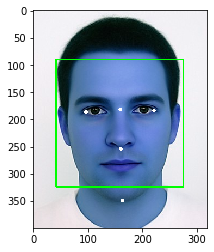

time: 3.41 s


In [25]:
# test on image

imagePath = "C:/Kayvan/eye detection/sample_image.jpg"  
cascPath = r'C:/Kayvan/eye detection/haarcascade_xml_files/haarcascades/haarcascade_frontalface_default.xml'  

PREDICTOR_PATH = "C:/Kayvan/eye_detect/model_data/shape_predictor_68_face_landmarks.dat"  

JAWLINE_POINTS = list(range(0, 17))  
RIGHT_EYEBROW_POINTS = list(range(17, 22))  
LEFT_EYEBROW_POINTS = list(range(22, 27))  
NOSE_POINTS = list(range(27, 36))  
RIGHT_EYE_POINTS = list(range(36, 42))  
LEFT_EYE_POINTS = list(range(42, 48))  
MOUTH_OUTLINE_POINTS = list(range(48, 61))  
MOUTH_INNER_POINTS = list(range(61, 68)) 

JAWLINE_POINTS1 = [8] 
NOSE_POINTS1 = [27,33] 
RIGHT_EYE_POINTS1 = [36]  
LEFT_EYE_POINTS1 = [45]  
   
# Create the haar cascade  
faceCascade = cv2.CascadeClassifier(cascPath)  

predictor = dlib.shape_predictor(PREDICTOR_PATH)  

# Read the image  
image = cv2.imread(imagePath)  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

# Detect faces in the image  
faces = faceCascade.detectMultiScale(  
    gray,  
    scaleFactor=1.05,  
    minNeighbors=1,  
    minSize=(100, 100),  
    flags=cv2.CASCADE_SCALE_IMAGE  
)  
   
print("Found {0} faces!".format(len(faces)))  

# Draw a rectangle around the faces  
for (x, y, w, h) in faces:  
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  

    # Converting the OpenCV rectangle coordinates to Dlib rectangle  
    dlib_rect = dlib.rectangle(int(x), int(y), int(x + w), int(y + h))  

    landmarks2 = np.matrix([[p.x, p.y]  
               for p in predictor(image, dlib_rect).parts()])  

    landmarks_display2 = landmarks2[RIGHT_EYE_POINTS1 + LEFT_EYE_POINTS1 + JAWLINE_POINTS1 + NOSE_POINTS1]  

    for idx, point in enumerate(landmarks_display2):  
        pos = (point[0, 0], point[0, 1])  
        cv2.circle(image, pos, 2, color=(255, 255, 255), thickness=2)  
   
plt.imshow(image)  

In [4]:
prototxt_path = os.path.join('C:/My Projects/eye_detect/model_data/deploy.prototxt')
caffemodel_path = os.path.join('C:/My Projects/eye_detect/model_data/weights.caffemodel')

model = cv2.dnn.readNetFromCaffe(prototxt_path,caffemodel_path)

time: 98.7 ms


In [6]:
predictor_path = 'C:/My Projects/eye_detect/model_data/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

time: 2.72 s


In [14]:
# camera test approach code
cap = cv2.VideoCapture(0)
cv2.namedWindow('FACE TRACKER')
while 1:
    ret,vid = cap.read()
    vid = cv2.flip(vid,1)
    
    gray_vid = cv2.cvtColor(vid,cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.bilateralFilter(gray_vid,9,75,75)
    gray_blur = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,3)
    
    rects = detector(gray_blur)    
    
    cv2.imshow('PUPIL TRACKER',gray_vid)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break
              
cv2.destroyAllWindows()
cap.release()

time: 19.3 s


In [5]:
# facial landmarks points
JAWLINE_POINTS1 = [8] 
NOSE_POINTS1 = [27,33] 
RIGHT_EYE_POINTS1 = [36]  
LEFT_EYE_POINTS1 = [45]  

print(JAWLINE_POINTS1,NOSE_POINTS1,RIGHT_EYE_POINTS1,LEFT_EYE_POINTS1)

[8] [27, 33] [36] [45]
time: 2 ms


In [21]:
# approach no.1

# Start video capture
vs = cv2.VideoCapture(0)

# Display each video frame
while True:
    ret, frame = vs.read()
    frame = cv2.flip(frame,1)
    
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    
    model.setInput(blob)
    detections = model.forward()
    
    for i in range(0, detections.shape[2]):
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        confidence = detections[0, 0, i, 2]
        
        # If confidence > 0.5, show box around face
        if (confidence > 0.95):
            # text = "{:.2f}%".format(confidence * 100)
            text = 'left'
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 1)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
            
        cv2.imshow("Frame", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vs.release()
cv2.destroyAllWindows()

time: 17.7 s


In [44]:
# approach no.2

# Start video capture
vs = cv2.VideoCapture(0)

# Display each video frame
while True:
    ret, frame = vs.read()
    frame = cv2.flip(frame,1)
    
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    
    model.setInput(blob)
    detections = model.forward()
    
    for i in range(0, detections.shape[2]):
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        confidence = detections[0, 0, i, 2]
        
        x = startX
        y = startY
        w = endX - startX
        h = endY - startY
        
#         dlib_rect = dlib.rectangle(int(startX), int(startY), int(endX), int(endY))
#         (x,y,w,h) = cv2.boundingRect()
#         roi_face = frame[startY:endY,startX:endX]
        
#         landmarks = np.matrix([[p.startX, p.startY] for p in predictor(frame,detections).parts()])  
#         landmarks_display = landmarks[RIGHT_EYE_POINTS1 + NOSE_POINTS1 + JAWLINE_POINTS1 + LEFT_EYE_POINTS1]
        
        # If confidence > 0.5, show box around face
        if (confidence > 0.95):
            # text = "{:.2f}%".format(confidence * 100)
            text = 'left'
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 1)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
            
            for x,y,w,h in detections:
                landmarks = np.matrix([[p.x, p.y] for p in predictor(frame,detections).parts()])  
                landmarks_display = landmarks[RIGHT_EYE_POINTS1 + NOSE_POINTS1 + JAWLINE_POINTS1 + LEFT_EYE_POINTS1]

                for idx, point in enumerate(landmarks_display):  
                    pos = (point[0, 0], point[0, 1])  
                    cv2.circle(frame, pos, 2, color=(0, 255, 255), thickness=2) 
            
        cv2.imshow("Frame", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vs.release()
cv2.destroyAllWindows()

ValueError: not enough values to unpack (expected 4, got 1)

time: 4.03 s


In [26]:
# distance calculation

print(landmarks_display2)
print(landmarks_display2[2][0,0])
print(landmarks_display2[2][0,1])

RIGHT_EYE_POINTS1_x = landmarks_display2[0][0,0]
RIGHT_EYE_POINTS1_y = landmarks_display2[0][0,1]

LEFT_EYE_POINTS1_x = landmarks_display2[1][0,0]
LEFT_EYE_POINTS1_y = landmarks_display2[1][0,1]

JAWLINE_POINTS1_x = landmarks_display2[2][0,0]
JAWLINE_POINTS1_y = landmarks_display2[2][0,1]

NOSE_POINTS1_up_x = landmarks_display2[3][0,0]
NOSE_POINTS1_up_y = landmarks_display2[3][0,1]

NOSE_POINTS2_down_x = landmarks_display2[4][0,0]
NOSE_POINTS2_down_y = landmarks_display2[4][0,1]

# right_mid = np.sqrt((RIGHT_EYE_POINTS1_x - NOSE_POINTS1_up_x)^2 + (RIGHT_EYE_POINTS1_y - NOSE_POINTS1_up_y)^2)
# left_mid = np.sqrt((LEFT_EYE_POINTS1_x - NOSE_POINTS1_up_x)^2 + (LEFT_EYE_POINTS1_y - NOSE_POINTS1_up_y)^2)
# chin_nose = np.sqrt((JAWLINE_POINTS1_x - NOSE_POINTS2_down_x)^2 + (JAWLINE_POINTS1_y - NOSE_POINTS2_down_y)^2)
# nose_mid = np.sqrt((JAWLINE_POINTS1_x - NOSE_POINTS1_up_x)^2 + (JAWLINE_POINTS1_y - NOSE_POINTS1_up_y)^2)

right_mid = np.abs(RIGHT_EYE_POINTS1_x - NOSE_POINTS1_up_x)
left_mid = np.abs(LEFT_EYE_POINTS1_x - NOSE_POINTS1_up_x)
chin_nose = np.abs(JAWLINE_POINTS1_y- NOSE_POINTS2_down_y)
nose_mid = np.abs(JAWLINE_POINTS1_y - NOSE_POINTS1_up_y)

if np.abs(right_mid - left_mid)<=5:
    print("Forward")
else:
    if (right_mid > left_mid):
        print('Right')
    else:
        print('Left')

print(right_mid,left_mid,chin_nose,nose_mid)

[[ 97 187]
 [222 184]
 [164 349]
 [160 182]
 [161 254]]
164
349
Forward
63 62 95 167
time: 12 ms


In [12]:
print(chin_nose,nose_mid)

76 130
time: 2 ms


In [ ]:
# test case 1

if np.abs(right_mid - left_mid<=5) and np.abs(-right_mid + left_mid<=5):
    if right_mid > left_mid:
        cv2.putText(frame, 'Right', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
    else:
        cv2.putText(frame, 'Left', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
else:
    cv2.putText(frame, 'Forward', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
    
# test case 2    
    
if right_mid == left_mid:
    cv2.putText(frame, 'Forward', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
else:
    if right_mid > left_mid:
        cv2.putText(frame, 'Right', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
    else:
        cv2.putText(frame, 'Left', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
        
# test case 3

if np.abs(right_mid - left_mid < =5):
    cv2.putText(frame, 'Forward', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
elif np.abs(right_mid - left_mid > =5) and (right_mid > left_mid):
    cv2.putText(frame, 'Left', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
else
    cv2.putText(frame, 'Right', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
    
# test case 4
if (right_mid > left_mid):
    cv2.putText(frame, 'Right', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
else:
    cv2.putText(frame, 'Left', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
    
# test case 5
if np.abs(right_mid - left_mid)<=5:
    cv2.putText(frame, 'Forward', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
else:
    if (right_mid > left_mid):
        cv2.putText(frame, 'Right', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
    else:
        cv2.putText(frame, 'Left', (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)


In [2]:
from time import sleep

In [14]:
ord(direction[0])

NameError: name 'direction' is not defined

time: 56 ms
